In [1]:
import tensorflow as tf
import keras

In [2]:
import numpy as np
import pandas as pd
# from keras.utils import np_utils
from tensorflow.python.keras.utils.np_utils import to_categorical

In [3]:
from keras.datasets import mnist
(x_Train , y_Train),(x_Test , y_Test) = mnist.load_data() # 呼叫 load_data() 載入 MNIST 資料集

"""
load_data() 傳回值是兩組 tuple (其元素為串列)
第一組是訓練資料, 第二組是測試資料
前為圖片 (image), 後為標籤 (label)
"""

11490434/11490434 [==============================] - 0s 0us/step


'\nload_data() 傳回值是兩組 tuple (其元素為串列)\n第一組是訓練資料, 第二組是測試資料\n前為圖片 (image), 後為標籤 (label)\n'

In [4]:
"""
將影像的特徵值轉換為4維矩陣以符合CNN要求格式：(data number, width, height, channel)
# shape[0]代表第一維的長度：資料總數
# 一般RGB圖片格式為(width, height, channels)
# channels為灰階，1代表單色
"""
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

## 數字影像特徵值標準化
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

## label(數字的真實的值)以Onehot encoding轉換
# y_TrainOneHot = np_utils.to_categorical(y_Train)
# y_TestOneHot = np_utils.to_categorical(y_Test)
y_TrainOneHot = to_categorical(y_Train)
y_TestOneHot = to_categorical(y_Test)

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

"""
Sequential 模型是多個網路的線性堆疊，
可當作模型容器並使用.add()來快速推疊
層級
"""
model = Sequential() # 定義模型：先實例化一個優化器對象

"""
新增一個卷積層
當使用該層作為模型第一層時，需要提供input_shape參數
# filiters 建立濾鏡(濾鏡數量，一個濾鏡會產生一個特徵圖)
# kernel_size 濾鏡大小，本例設置成5X5
# padding=’same’ 卷積運算不改變圖片大小
# activation=’relu’ 設定激活函數relu
"""
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2))) # 新增一個池化層：設定池化窗口為2X2

model.add(Conv2D( filters=36, kernel_size=(5,5), padding='same', activation='relu')) # 再新增一個卷積層跟池化層(這裡濾鏡filiters 改為36個)

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25)) # 加入Droput可避免過擬合overfitting
"""
1.因為輸入層輸入的資料維度通常為1
所以使用Flatten()平坦層將資料壓成1維
2.Dense() : 全連接層，
可以看作一個基本類神經網路
3.使用softmax激勵函數
可表示這個樣本屬於每個類的概率
"""
model.add(Flatten()) # 建立平坦層，進行攤平
model.add(Dense(128, activation='relu')) # 建立隱藏層
model.add(Dropout(0.5)) # Dropout
model.add(Dense(10, activation='softmax')) # 建立輸出層

model.summary() # 模型做總結(打包的感覺)

"""
使用compile來定義損失函數、優化函數及成效衡量指標
loss:函數使用深度學習中常用的cross entropy(交叉熵)
optimizer:採用梯度下降法採取最常用的演算法adam
metrics:模型的評估方式則以accuracy為主
"""
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 36)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0

In [6]:
"""
開始訓練：存放在train_history中，以便稍後列印出訓練歷程
epochs 代表訓練的週期(將6萬筆資料訓練過一次稱為1個epoch)
batch_size 代表每一批訓練了多少筆資料
validation_split=0.2 代表從訓練資料集中取20%來當作驗證資料集
verbose 訓練日誌顯示模式 (0 =安靜模式, 1 =進度條, 2 =每輪一行)
"""
train_history=model.fit(x=x_Train4D_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=300, verbose=1)

Epoch 1/10
160/160 [==============================] - 17s 13ms/step - loss: 0.4954 - accuracy: 0.8440 - val_loss: 0.1032 - val_accuracy: 0.9695
Epoch 2/10
160/160 [==============================] - 1s 8ms/step - loss: 0.1461 - accuracy: 0.9567 - val_loss: 0.0692 - val_accuracy: 0.9783
Epoch 3/10
160/160 [==============================] - 1s 8ms/step - loss: 0.1063 - accuracy: 0.9674 - val_loss: 0.0532 - val_accuracy: 0.9833
Epoch 4/10
160/160 [==============================] - 1s 8ms/step - loss: 0.0843 - accuracy: 0.9750 - val_loss: 0.0464 - val_accuracy: 0.9859
Epoch 5/10
160/160 [==============================] - 1s 8ms/step - loss: 0.0728 - accuracy: 0.9784 - val_loss: 0.0425 - val_accuracy: 0.9872
Epoch 6/10
160/160 [==============================] - 1s 8ms/step - loss: 0.0635 - accuracy: 0.9805 - val_loss: 0.0421 - val_accuracy: 0.9872
Epoch 7/10
160/160 [==============================] - 1s 8ms/step - loss: 0.0568 - accuracy: 0.9829 - val_loss: 0.0349 - val_accuracy: 0.9887
Epoc

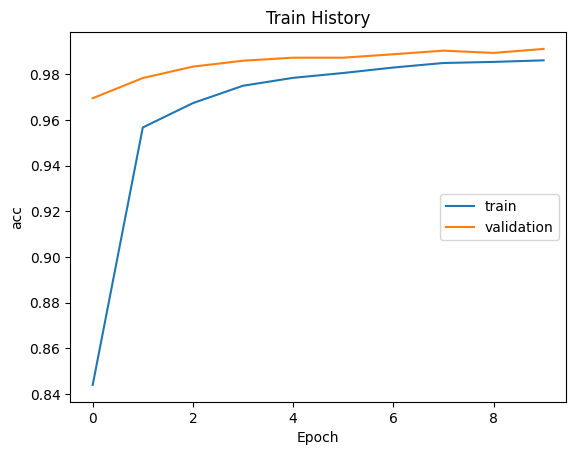

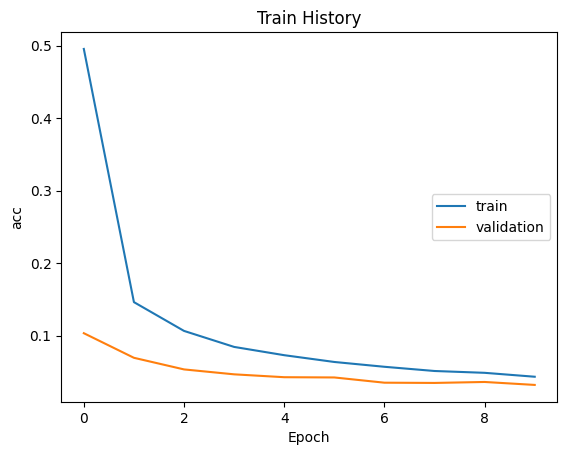

In [7]:
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel('acc')
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='center right')
  plt.show()

import matplotlib.pyplot as plt
show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

In [8]:
## 評估模型準確率：將處理過的測試資料放入model.evaluate()中評估模型準確率
loss, accuracy = model.evaluate(x_Test4D_normalize , y_TestOneHot)
print( "\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy* 100 ))

313/313 [==============================] - 1s 3ms/step - loss: 0.0238 - accuracy: 0.9911

Loss: 0.02, Accuracy: 99.11%


In [9]:
## 顯示混淆矩陣：顯示測試資料預測結果統計與實際結果統計的差異
prediction=np.argmax(model.predict(x_Test4D_normalize), axis=1)
pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict'])

313/313 [==============================] - 1s 2ms/step


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,0,0,0,0,3,1,0,0
1,0,1131,1,1,0,1,1,0,0,0
2,2,1,1024,0,0,0,0,3,2,0
3,0,0,1,1000,0,6,0,1,2,0
4,0,0,0,0,979,0,1,0,0,2
5,1,0,0,4,0,885,1,0,0,1
6,6,2,0,1,1,4,944,0,0,0
7,0,2,4,3,0,0,0,1016,1,2
8,3,1,1,1,0,1,0,1,964,2
